In [18]:
# loading the relevant libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [14]:
# loading tensorflow and keras
import tensorflow as tf
from tensorflow import keras

Dataset containing  2357  pictures of the 9 types. We will use 1470 pictures for training, 420 for validation, and finally 210 for testing. The image below illustares the procedure I have used to train the data.

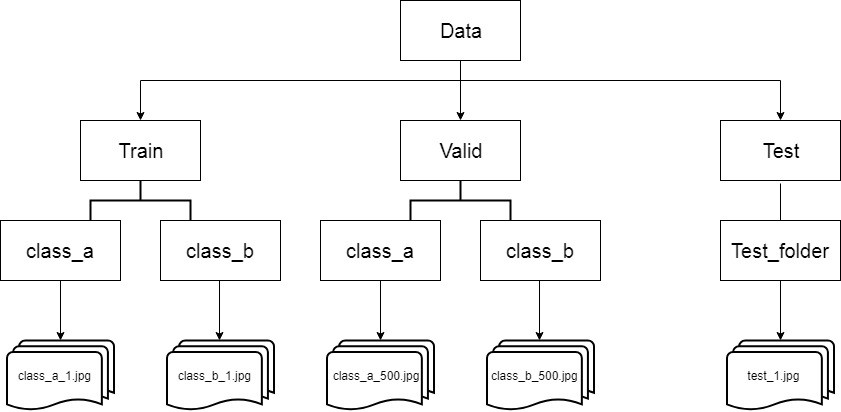

In [4]:
# Reading the train, validation and test sets from the directory
train_dir = r"C:\Users\ALLANOOH\Desktop\Upwork\CNN\train"
validation_dir = r"C:\Users\ALLANOOH\Desktop\Upwork\CNN\valid"
test_dir =r"C:\Users\ALLANOOH\Desktop\Upwork\CNN\test"

### Data Preprocessing

This will entail:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [4]:
# loading the keras image generator module to carry out the preprocessing
# that is the steps entioned above.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generating batches of tensor image data
#
# rescaling the datasets by dividing by 255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the train and validation generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
    # resizing the images to 180 by 180 pixels
        target_size=(180, 180),
    # passing the batches of 32
        batch_size=32,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
    # resizing the images to 180 by 180 pixels
        target_size=(180, 180),
    # passing the batches of 32
        batch_size=32,
        class_mode='sparse')

Found 1470 images belonging to 9 classes.
Found 420 images belonging to 9 classes.


In [6]:
# loading the layers and models from tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
# creating the model structure
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(9, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [9]:
# compiling the model
from tensorflow.keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
# fitting the training data in the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 216s 2s/step - loss: 1.9631 - acc: 0.2278 - val_loss: 1.7968 - val_acc: 0.3536
Epoch 2/20
100/100 [==============================] - 205s 2s/step - loss: 1.7151 - acc: 0.3595 - val_loss: 1.5634 - val_acc: 0.5013
Epoch 3/20
100/100 [==============================] - 212s 2s/step - loss: 1.5927 - acc: 0.4208 - val_loss: 1.5377 - val_acc: 0.5046
Epoch 4/20
100/100 [==============================] - 213s 2s/step - loss: 1.4792 - acc: 0.4781 - val_loss: 1.4975 - val_acc: 0.4947
Epoch 5/20
100/100 [==============================] - 209s 2s/step - loss: 1.3865 - acc: 0.5072 - val_loss: 1.5008 - val_acc: 0.5185
Epoch 6/20
100/100 [==============================] - 215s 2s/step - loss: 1.3521 - acc: 0.5210 - val_loss: 1.3886 - val_acc: 0.5521
Epoch 7/20
100/100 [==============================] - 210s 2s/step - loss: 1.2532 - acc: 0.5519 - val_loss: 

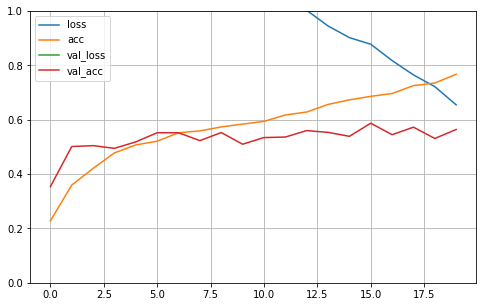

In [11]:
# ploting the accuracy values on a graph
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Its observed that there is a very large difference between the training anf=d the validation accuracy. The training accuracy is increasing with each epoch while the validation accuracy is oscilating along 50%. This suggests that there is overfitting in our model since, the training accuracy is increasing with each epoch but we cannot increase our accuracy.

To fix we will create some dummy data to modify our existing data by applying zoom, shear, rotation and then train the model again after modifying the data

we will also add a dropout layer in the model architechture

In [12]:
# saving our model
model.save("model.h5")

In [13]:
# deleting the model and clearing the session
from tensorflow.keras import backend as K 

K.clear_session()
del model

## Data Augmentation 

In [14]:
# applying zoom, shear, rotation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# rescaling the dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# transforming the data to tensors
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 180),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        batch_size=20,
        class_mode='sparse')


Found 1470 images belonging to 9 classes.
Found 420 images belonging to 9 classes.


In [15]:
# creating the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# adding a dropout layer to deactivate 50% of each epoch in our neuron
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(9, activation='sigmoid'))

# compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
# fitting the training data in the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=74,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=21)

Epoch 1/20
74/74 [==============================] - 97s 1s/step - loss: 2.0238 - acc: 0.2122 - val_loss: 1.9847 - val_acc: 0.2357
Epoch 2/20
74/74 [==============================] - 90s 1s/step - loss: 1.9425 - acc: 0.2415 - val_loss: 1.8106 - val_acc: 0.3238
Epoch 3/20
74/74 [==============================] - 92s 1s/step - loss: 1.7794 - acc: 0.3238 - val_loss: 1.6579 - val_acc: 0.3929
Epoch 4/20
74/74 [==============================] - 92s 1s/step - loss: 1.7167 - acc: 0.3293 - val_loss: 1.5996 - val_acc: 0.4000
Epoch 5/20
74/74 [==============================] - 92s 1s/step - loss: 1.6729 - acc: 0.3517 - val_loss: 1.7463 - val_acc: 0.3690
Epoch 6/20
74/74 [==============================] - 90s 1s/step - loss: 1.6181 - acc: 0.3810 - val_loss: 1.5353 - val_acc: 0.4786
Epoch 7/20
74/74 [==============================] - 91s 1s/step - loss: 1.5940 - acc: 0.4027 - val_loss: 1.8459 - val_acc: 0.3810
Epoch 8/20
74/74 [==============================] - 91s 1s/step - loss: 1.5503 - acc: 0.42

In [17]:
# saving the model
model.save("project_cnn.h5")

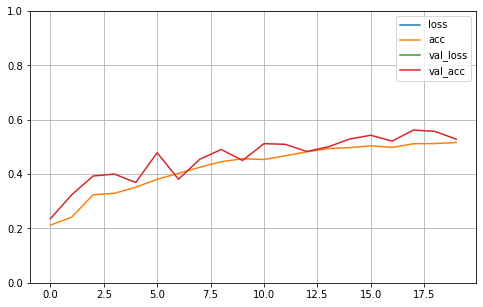

In [18]:
# ploting the accuracy values on a graph
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can note that there is an improvement in the training and the validation accuracy, thus less evidence of overfitting.

In [19]:
keras.backend.clear_session
del model

# VGG16

We will use to increase validation accuracy.

In [5]:
# applying zoom, shear, rotation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 180),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        batch_size=20,
        class_mode='sparse')

Found 1470 images belonging to 9 classes.
Found 420 images belonging to 9 classes.


In [6]:
# creating the model architecture using a convolutional base of VGG16
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(180, 180, 3))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# Summary of the conv base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [9]:
# creating the model
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(9, activation='sigmoid'))

In [10]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3277056   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 2313      
Total params: 17,994,057
Trainable params: 17,994,057
Non-trainable params: 0
_________________________________________________________________


In [25]:
# conv_base.trainable = False

In [13]:
# compiling the model
from tensorflow.keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [15]:
# using callbacks to save our model after each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [16]:
# fitting the training data in the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=74,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=21,
      callbacks=[checkpoint_cb])

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
74/74 [==============================] - 1292s 17s/step - loss: 1.9084 - acc: 0.2592 - val_loss: 1.6205 - val_acc: 0.4476
Epoch 2/20
74/74 [==============================] - 1289s 17s/step - loss: 1.5728 - acc: 0.4197 - val_loss: 1.3230 - val_acc: 0.5857
Epoch 3/20
74/74 [==============================] - 1292s 17s/step - loss: 1.3459 - acc: 0.5048 - val_loss: 1.2477 - val_acc: 0.5905
Epoch 4/20
74/74 [==============================] - 1290s 17s/step - loss: 1.2286 - acc: 0.5490 - val_loss: 1.1299 - val_acc: 0.6024
Epoch 5/20
74/74 [==============================] - 1291s 17s/step - loss: 1.1257 - acc: 0.5823 - val_loss: 1.4247 - val_acc: 0.5167
Epoch 6/20
74/74 [==============================] - 1293s 17s/step - loss: 1.0864 - acc: 0.6082 - val_loss: 1.1648 - val_acc: 0.5881
Epoch 7/20
74/74 [==============================] - 1293s 17s/step - loss: 1.0070 - acc: 0.6327 - val_loss: 

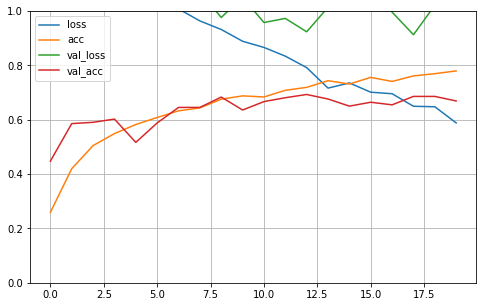

In [19]:
# ploting the accuracy values on a graph
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
# cheching on the details of the model
hist_df = pd.DataFrame(history.history) 

In [21]:
# saving the model in csv file
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [22]:
# evaluating the model perforance with the test set
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(180, 180),
        batch_size=20,
        class_mode='sparse')

Found 210 images belonging to 9 classes.


In [23]:
# Evaluating the model
model.evaluate_generator(test_generator, steps=21)

[1.3650835951169331, 0.64634144]